In [2]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 809.0 kB/s eta 0:00:12
   -- ------------------------------------- 0.5/9.5 MB 809.0 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.5 MB 733.3 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.5 MB 830.0 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.5 MB 924.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.5 MB 960.4 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.5 MB 932.0 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.5 MB 932.0 kB/s eta 0:00:09
   -------- -------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Metrics
from sklearn.metrics import mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Load dataset
df = pd.read_csv("features.csv")   # change file name if needed

# View first 5 rows
df.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
print(df.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [8]:
df = pd.read_csv("features.csv")
print(df.columns)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 775.8 KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')



In [15]:
monthly_sales = df.resample('M', on='Date')['Store'].sum().reset_index()


In [16]:
monthly_sales.set_index('Date', inplace=True)
monthly_sales.head()


,Store
Date,
2010-02-28,4140
2010-03-31,4140
2010-04-30,5175
2010-05-31,4140
2010-06-30,4140


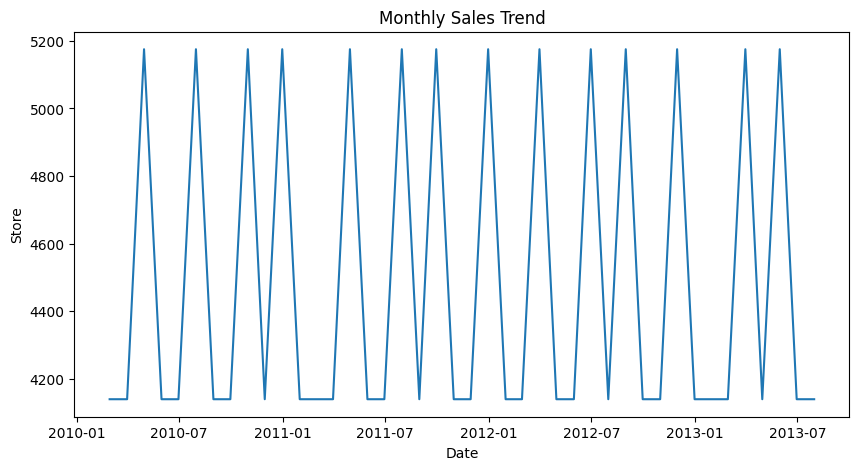

In [17]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Store'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Store")
plt.show()


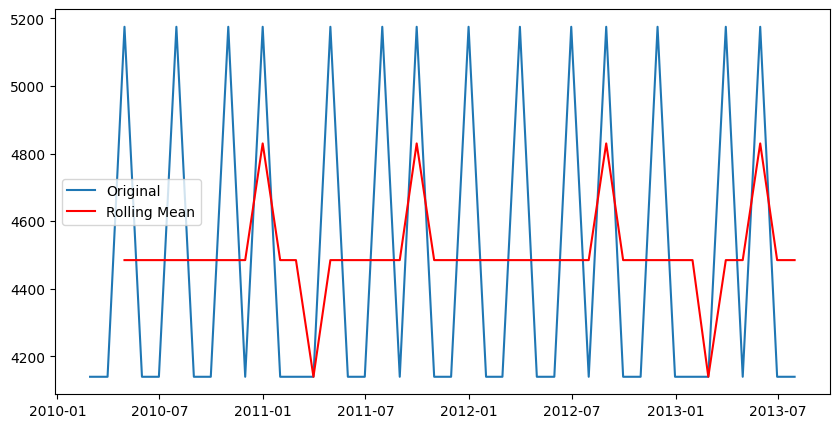

In [18]:
monthly_sales['Rolling_Mean'] = monthly_sales['Store'].rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Store'], label='Original')
plt.plot(monthly_sales['Rolling_Mean'], label='Rolling Mean', color='red')
plt.legend()
plt.show()


In [19]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

print("Train Size:", len(train))
print("Test Size:", len(test))




Train Size: 33
Test Size: 9


In [20]:
model = ExponentialSmoothing(train['Store'], trend='add', seasonal=None)
model_fit = model.fit()

forecast = model_fit.forecast(len(test))


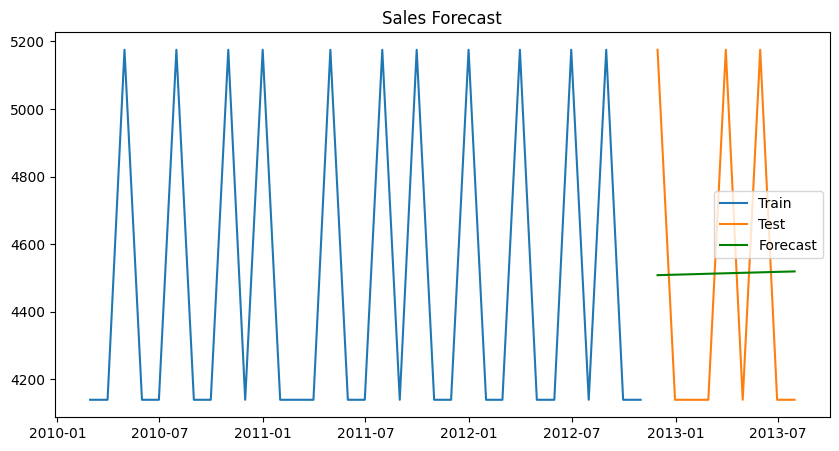

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Store'], label='Train')
plt.plot(test.index, test['Store'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title("Sales Forecast")
plt.show()


In [22]:
mae = mean_absolute_error(test['Store'], forecast)

mape = np.mean(np.abs((test['Store'] - forecast) / test['Store'])) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 470.3015522444264
MAPE: 10.294138993988557


In [23]:
future_forecast = model_fit.forecast(3)

print("Next 3 Months Forecast:")
print(future_forecast)


Next 3 Months Forecast:
2012-11-30    4508.524323
2012-12-31    4509.908136
2013-01-31    4511.291948
Freq: ME, dtype: float64


In [25]:
forecast_output = pd.DataFrame({
    'Date': test.index,
    'Actual_Sales': test['Store'],
    'Forecast_Sales': forecast
})

forecast_output.to_csv("forecast_output.csv", index=False)


In [27]:
forecast_output = pd.DataFrame({
    'Date': test.index,
    'Actual_Sales': test['Store'],
    'Forecast_Sales': forecast
})

forecast_output.to_csv("forecast_output.csv", index=False)

print("forecast_output.csv saved successfully!")


forecast_output.csv saved successfully!
